# A Hybrid Probabilistic Multiobjective Evolutionary Algorithm for Commercial Recommendation Systems

Este archivo contiene una implementación del algoritmo HP-MOEA (Hybrid Probabilistic Multiobjective Evolutionary Algorithm), el cual integra técnicas de sistemas de recomendación con algoritmos evolutivos de optimización multiobjetivo. La descripción detallada del enfoque original se encuentra en este [paper](https://ieeexplore.ieee.org/abstract/document/9363322).


## Requerimientos

Para este proyecto se utilizan las siguientes bibliotecas: NumPy, Pandas, Scikit-learn, Pymoo y Seaborn.

Asegúrese de instalar las dependencias ejecutando el siguiente comando:

In [4]:
%pip install numpy pandas scikit-learn pymoo seaborn

Note: you may need to restart the kernel to use updated packages.


## Preprocesamiento de datos

Iniciaremos con el preprocesamiento de los datos utilizando el dataset MovieLens, desarrollado por la Universidad de Minnesota, el cual está disponible para uso libre con fines de investigación. Este dataset contiene calificaciones asignadas por usuarios a diversas películas. En esta implementación se utilizará la versión de 100,000 calificaciones, que abarca el período comprendido entre 1996 y 2018.

Para más información sobre el dataset, puede consultarse el siguiente [enlace oficial](https://grouplens.org/datasets/movielens/)

Para ver detalles de la implemetación del preprocesamiento, vea el archivo preprocess.py

In [5]:
dataset_100k_path = '../../datasets/ml-latest-small/ratings.csv'
dataset_20m_path = '../../datasets/movielens-20m-dataset/rating.csv'
data_path = './data/'
top_usuarios = 10000
top_peliculas = 2000

In [6]:
import preprocess

preprocess.main(dataset_100k_path, data_path, top_usuarios, top_peliculas)


Leyendo el dataset desde: ../../datasets/ml-latest-small/ratings.csv
Ajustando los IDs de usuario para que comiencen desde 0
Creando un mapeo para los IDs de películas
Eliminando la columna 'timestamp'

Tamaño del dataframe original: 100836
Contando la cantidad de ratings por usuario y por película
Seleccionando los 10000 usuarios y 2000 películas más comunes
Filtrando el dataframe para que solo contenga los usuarios y películas seleccionados
Creando nuevos mapeos para los IDs de usuario y película
ID máximo de usuario: 609
ID máximo de película: 1999
Tamaño del dataframe reducido: 78305

Barajando el dataframe
Llamando a: update_user2movie_and_movie2user
Llamando a: update_usermovie2rating_test
Guardando los diccionarios en archivos
user2movie guardado en ./data/user2movie.json
movie2user guardado en ./data/movie2user.json
usermovie2rating guardado en ./data/usermovie2rating.json
usermovie2rating_test guardado en ./data/usermovie2rating_test.json


## Filtrado colaborativo basado en usuarios

El siguente paso luego del preprocesamiento de los datos para HP-MOEA, es calcular la puntuación esperada de los ítems que los usuarios aun no han calificado, para ello se emplea el filtrado colaborativo basado en usuarios, la cual es la tecnica mas sencilla de los S.R

Para ver mas detalles de como se implemento el filtrado colaborativo basado en usuarios, ver el archivo User_based_CF.py


In [7]:
import User_based_CF

K = 25
limit = 5
calcular_pesos = True
hacer_test = True

usermovie2predict_rating = User_based_CF.main(data_path, K, limit, calcular_pesos, hacer_test)

Cargamos los datos preprocesados...

Longitud de los datos preprocesados:
user2movie:  610
movie2user:  8939
usermovie2rating:  80668
usermovie2rating_test:  20168

Numero total de usuarios:  610
Numero total de ítems (peliculas):  9724

Calculando los pesos (weights)...
Con la siguente configuración:
K:  25  (cantidad maxima de vecinos que almacenaremos por cada usuario)
limit:  5  (minima cantidad de ítems en comun que deben tener dos usuarios para calcular la correlación)

[2025-03-10 13:00:20] Calculo de pesos: 0.0%, Transcurrido: 0.04 segundos
[2025-03-10 13:00:21] Calculo de pesos: 4.92%, Transcurrido: 1.16 segundos
[2025-03-10 13:00:22] Calculo de pesos: 9.84%, Transcurrido: 2.18 segundos
[2025-03-10 13:00:23] Calculo de pesos: 14.75%, Transcurrido: 3.32 segundos
[2025-03-10 13:00:24] Calculo de pesos: 19.67%, Transcurrido: 4.30 segundos
[2025-03-10 13:00:25] Calculo de pesos: 24.59%, Transcurrido: 5.21 segundos
[2025-03-10 13:00:26] Calculo de pesos: 29.51%, Transcurrido: 6.08 

## Definición de clases y funciones de apoyo
TO DO: Añadir descripción

## Definición de la clase HP_MOEA_Class
TO DO: Añadir una descripción

In [8]:
import os
import pickle
import User_based_CF as UBCF

class HP_MOEA_Class():

    def __init__(self, data_path):
        self.data_path = data_path


    def load_train_dataset(self):
        print('Cargamos los datos preprocesados...')
        train_dataset = {
            "user2movie": {},
            "movie2user": {},
            "usermovie2rating": {},
            "usermovie2rating_test": {},
            "usermovie2predict_rating": {}
        }

        if os.path.exists(f'{self.data_path}user2movie.json') and \
            os.path.exists(f'{self.data_path}movie2user.json') and \
            os.path.exists(f'{self.data_path}usermovie2rating.json') and \
                os.path.exists(f'{self.data_path}usermovie2rating_test.json') and \
            os.path.exists(f'{self.data_path}usermovie2predict_rating.json'):

            with open(f'{self.data_path}/user2movie.json', 'rb') as f:
                train_dataset["user2movie"] = pickle.load(f)

            with open(f'{self.data_path}/movie2user.json', 'rb') as f:
                train_dataset["movie2user"] = pickle.load(f)

            with open(f'{self.data_path}/usermovie2rating.json', 'rb') as f:
                train_dataset["usermovie2rating"] = pickle.load(f)

            with open(f'{self.data_path}/usermovie2rating_test.json', 'rb') as f:
                train_dataset["usermovie2rating_test"] = pickle.load(f)

            with open(f'{self.data_path}/usermovie2predict_rating.json', 'rb') as f:
                train_dataset["usermovie2predict_rating"] = pickle.load(f)

        print('\nLongitud de los datos preprocesados:')
        print("user2movie: ", len(train_dataset["user2movie"]))
        print("movie2user: ", len(train_dataset["movie2user"]))
        print("usermovie2rating: ", len(train_dataset["usermovie2rating"]))
        print("usermovie2rating_test: ", len(train_dataset["usermovie2rating_test"]))
        print("usermovie2predict_rating: ", len(train_dataset["usermovie2predict_rating"]))

        self.train_dataset = train_dataset


    def User_based_CF(self, use_precalculated_CF, CF_config):
        if use_precalculated_CF:
            with open(f'{self.data_path}usermovie2predict_rating.json', 'rb') as f:
                self.usermovie2predict_rating = pickle.load(f)
        else:
            self.usermovie2predict_rating = UBCF.main(self.data_path, CF_config["K"], CF_config["limit"], CF_config["calcular_pesos"], CF_config["hacer_test"])


    def generate_initial_population(self):
        raise NotImplementedError("Aun no esta implementado xd xd xd")


    def termination_condition(self):
        raise NotImplementedError("Aun no esta implementado xd xd xd")


    def generate_new_population_NSGAII(self):
        raise NotImplementedError("Aun no esta implementado xd xd xd")


    def select_population_NSGAII(self):
        raise NotImplementedError("Aun no esta implementado xd xd xd")


    def get_hypervolume_from_population(self):
        raise NotImplementedError("Aun no esta implementado xd xd xd")


    def generate_new_individual_SMS_EMOA(self):
        raise NotImplementedError("Aun no esta implementado xd xd xd")


    def reduce_individual_from_population_SMS_EMOA(self):
        raise NotImplementedError("Aun no esta implementado xd xd xd")


## Ciclo principal de ejecución del algoritmo HP-MOEA

TO DO: Añadir una descripción

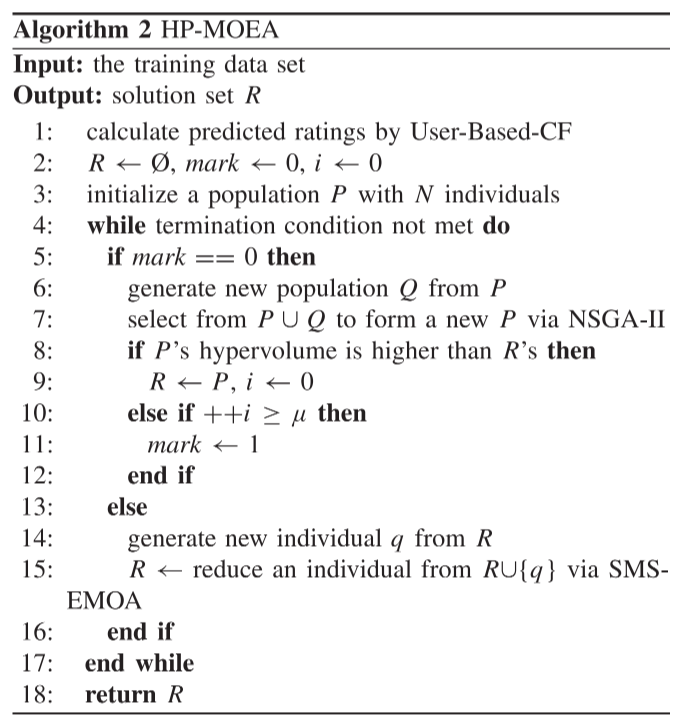

In [9]:
data_path = './data/' #TO DO: Borrar esto luego

use_precalculated_CF = True
CF_config = {
    "K": 25,
    "limit": 5,
    "calcular_pesos": False,
    "hacer_test": False,
}
u = 500 # TO DO: Ver el valor

hp_moea = HP_MOEA_Class(data_path)
hp_moea.load_train_dataset()

def HP_MOEA_LOOP(u, use_precalculated_CF = True, CF_config = {}):

    hp_moea.User_based_CF(use_precalculated_CF, CF_config)

    R_population = []
    mark = 0
    i = 0

    P_population = hp_moea.generate_initial_population()
    while not hp_moea.termination_condition():
        if mark == 0:

            Q_new_population = hp_moea.generate_new_population_NSGAII()
            P_population = hp_moea.select_population_NSGAII(P_population, Q_new_population)

            P_hypervolume = hp_moea.get_hypervolume_from_population(P_population)
            R_hypervolume = hp_moea.get_hypervolume_from_population(R_population)

            if P_hypervolume > R_hypervolume:
                R_population = P_population
                i = 0
            elif (i := i + 1) >= u:
                mark = 1
        else:
            q_individual = hp_moea.generate_new_individual_SMS_EMOA(R_population)
            R_population = hp_moea.reduce_individual_from_population_SMS_EMOA(R_population, q_individual)

    return R_population


poblacion_final = HP_MOEA_LOOP(u, use_precalculated_CF, CF_config)


Cargamos los datos preprocesados...

Longitud de los datos preprocesados:
user2movie:  610
movie2user:  8939
usermovie2rating:  80668
usermovie2rating_test:  20168
usermovie2predict_rating:  5850972


NotImplementedError: Aun no esta implementado xd xd xd

## Resultados y visualización

In [10]:
import seaborn as snb